# Guide to NumPy For Scientific Computing
> In this blog we will dive deeper in understanding the working of numpy along with exercises.

- toc: true
- badges: true
- comments: true
- categories: [python, numpy]
- image: images/guide-to-numpy-banner.png


This post assumes that you have the necessary skills to work with Python. If you are new to Python, I would highly encourage you to go through [Google’s Python Class](https://developers.google.com/edu/python) first. It’s an excellent place for beginners and also offers exercises to get your hands dirty.

Python is a great general-purpose programming language, but it becomes really convenient and powerful for Machine Learning and Data Science with a few popular libraries. The libraries provide efficient code optimization and memory management, along with some additional features and functionalities.


## Introduction

Although all the computations can be done by Python on its own stand-alone, these libraries provide a much efficient way of doing the computations.

Let’s go through an example to understand the importance of these libraries.

Create a list of numbers from 1 to 5 and multiply the elements by 2:


In [1]:
l = [1, 2, 3, 4, 5]
print(l)

res = l * 2
print(res)  # Notice something different

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


Multiplying the list by x concatenates the elements of the list x times. We’ll have to write a function for multiplying the elements of the list by 2.


In [2]:
def multiply_2(arr):
    """
    Multiply elements of list by 2
    Parameters:
    arr - list
          Input list
    """
    for i in range(len(arr)):
        arr[i] = arr[i] * 2
    return arr

res = multiply_2(l)
print(res)

[2, 4, 6, 8, 10]


What’s the problem with the above computation?

This seems fine if we are working on data in smaller quantities, but we work with data in larger quantities, this approach becomes really inefficient. This is where these powerful libraries come in to aid us.

Don’t worry if you don’t get the syntax initially; you’ll get it as we progress through the post.


In [3]:
# load the numpy library
import numpy as np

In [4]:
a = np.array([1, 2, 3, 4, 5])
print(a)

res = a * 2
print(res)

[1 2 3 4 5]
[ 2  4  6  8 10]


This library uses a vectorized approach, which simply means applying the operations on whole arrays instead of individual elements. This vectorized code is highly optimized and written in C.


In [5]:
%%timeit
multiply_2(l)

The slowest run took 4.88 times longer than the fastest. This could mean that an intermediate result is being cached.
77.5 µs ± 33 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%%timeit
a * 2

995 ns ± 292 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


The time of execution when using these libraries is really short compared to regular python. There are many more reasons that drive us towards the usage of these libraries. But let’s get started with the usage of these libraries:


## NumPy

[Numpy](http://www.numpy.org/) is the core library for doing scientific computing in Python involves working the multidimensional arrays. Many libraries are built on top of NumPy.


### Basics

A NumPy array is a grid of values, all of the same type. Nested python lists can be used to initialize the array. You can access elements with square brackets for the 1D array, but for the 2D array, it’s a little different.


In [7]:
# load the library using np as alias
import numpy as np

In [8]:
# Create a 1D array
a = np.array([1, 2, 3, 4])
print(a)

# Create a 2D array
b = np.array([[1, 2], [3, 4]])
print(b)

[1 2 3 4]
[[1 2]
 [3 4]]


Let’s write a function which gives us more details of these NumPy arrays:


In [9]:
def print_info(arr):
    """
    Prints details of the numpy array
    Parameters:
    arr - nd array
          Input array
    """
    print('number of elements:', arr.size)
    print('number of dimensions:', arr.ndim)
    print('shape:', arr.shape)
    print('data type:', arr.dtype)
    print('strides:', arr.strides)
    print('flags:', arr.flags)

- `ndarray.size`: Tells us about the number of elements in a NumPy array.
- `ndarray.ndim`: Tells us about the number of dimensions in a NumPy array.
- `ndarray.shape`: Tells us about the size of the NumPy array along each dimension.
- `ndarray.dtype`: Tells us about the data type of elements in a NumPy array.
- `ndarray.strides`: Tells us about the no. of bytes need to step in each dimension to access the adjacent element. Strides will be multiples of 8 along each dimension.
- `ndarray.flags`: Tells us about how the NumPy array is stored in memory. `C_CONTIGUOUS` tells us that elements in the memory are row-wise. `F_CONTIGUOUS` tells us that elements in the memory are column-wise.


In [10]:
print_info(a)

number of elements: 4
number of dimensions: 1
shape: (4,)
data type: int64
strides: (8,)
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [11]:
print_info(b)

number of elements: 4
number of dimensions: 2
shape: (2, 2)
data type: int64
strides: (16, 8)
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



Numpy arrays are referenced based. They point to the same array in memory when you assign a defined array to another variable. So you should be careful that you don’t modify the information in place, which may be useful for later purposes.


In [12]:
a = np.array([0, 1, 2, 3, 4])
print('a:', a)

b = a
a[0] = 5
print('b:', b)
a[0] = 0

a: [0 1 2 3 4]
b: [5 1 2 3 4]


Numpy provides a `copy` method to create a copy of the same array in memory.


In [13]:
print('a:', a)

b = a.copy()
a[0] = 5
print('b:', b)

a: [0 1 2 3 4]
b: [0 1 2 3 4]


Numpy also provides many functions to create arrays. Most of the functions take shape as a parameter.


In [14]:
# Create an array of all ones
a = np.ones((1, 3))
print('a:', a)

# Create an array of all zeros
b = np.zeros((1, 3))
print('b:', b)

# Create a constant array
c = np.full((1, 3), 4)          
print('c:', c)

# Create an identity matrix of 3x3
d = np.eye(3)                   
print('d:', d)

# Create an array of random values
e = np.random.random((1, 3))    
print('e:', e)

# Create an array of random values from uniform distribution
f = np.random.rand(3)
print('f:', f)

# Create an array of random values from normal distribution
g = np.random.randn(3)
print('g:', g)

a: [[1. 1. 1.]]
b: [[0. 0. 0.]]
c: [[4 4 4]]
d: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
e: [[0.22551855 0.18974127 0.87953329]]
f: [0.54819848 0.01511915 0.5365319 ]
g: [-0.87897997 -1.95487666  0.62275   ]


Numpy array provides different numeric datatypes options to construct the arrays. This can be really useful when you have a large dataset, so you can set the datatype based on the data limits to be memory efficient.


In [15]:
# Numpy chooses the datatype
a = np.array([[1, 0],
              [0, 1]])
print('Datatype of a:', a.dtype)

b = np.array([[1.0, 0],
              [0, 1.0]])
print('Datatype of b:', b.dtype)

# Explicitly specify the datatype
c = np.array([[1, 0],
              [0, 1]], dtype=np.int32)
print('Datatype of c:', c.dtype)

d = np.array([[1.0, 0],
              [0, 1.0]], dtype=np.float32)
print('Datatype of d:', d.dtype)

Datatype of a: int64
Datatype of b: float64
Datatype of c: int32
Datatype of d: float32


### Slicing

Although slicing is similar to Python lists, there’s a slight difference for multi-dimensional arrays. We need to `specify the slice for each dimension` of the array.

Let’s walk through some examples to get a better understanding:


In [16]:
# Create an array of shape (4, 4)
a = np.array([[0, 1, 2, 3], 
              [4, 5, 6, 7],
              [8, 9, 10, 11],
              [12, 13, 14, 15]])

print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [17]:
# Slice the first 2 rows from array a
a[:2, :]    # same as a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [18]:
# Slice the first 2 rows and first 2 cols from array a
a[:2, :2]

array([[0, 1],
       [4, 5]])

In [19]:
# Slice the alternate rows and alternate cols from array a
a[::2, ::2]

array([[ 0,  2],
       [ 8, 10]])

Now try slicing the four center elements of the array:


In [20]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [21]:
# Alternative way to extract the same elements but the dimension would be reduced to one
a[[1, 1, 2, 2], [1, 2, 1, 2]]

array([ 5,  6,  9, 10])

Now try accessing the elements 1, 2, 4, 7 of the array such that the dimension is not reduced:


In [22]:
a[[[0, 0], [1, 1]], [[1, 2], [0, 3]]]

array([[1, 2],
       [4, 7]])

In [23]:
# Alternative way for getting the above result
a[[[0], [1]], [[1, 2], [0, 3]]]

array([[1, 2],
       [4, 7]])

Note that the alternative way uses broadcasting, which will be discussed later in the post. Things will be much clearer there, so please have a bit of patience.


### Functions and Aggregations

Numpy comes with a lot of built-in functions, which are useful for performing various computations efficiently. One can perform arithmetic, matrix, trigonometric, exponent, logarithm operations, and many more.

Let's go through a few of these operations:


In [24]:
a = np.array([[0, 1],
              [2, 3]])
print('a:', a)

b = np.ones((2, 2))
print('b:', b)

a: [[0 1]
 [2 3]]
b: [[1. 1.]
 [1. 1.]]


#### Arithmetic Operations


In [25]:
# Elementwise sum
print('a + b =', np.add(a, b))                 # same as print(a + b)

# Elementwise difference
print('a - b =', np.subtract(a, b))     # same as print(a - b)

# Elementwise product
print('a * b =', np.multiply(a, b))        # same as print(a * b)

# Elementwise division
print('a / b =', np.divide(a, b))         # same as print(a / b)

# Elementwise modulo
print('a % b =', np.mod(a, b))              # same as print(a % b)

a + b = [[1. 2.]
 [3. 4.]]
a - b = [[-1.  0.]
 [ 1.  2.]]
a * b = [[0. 1.]
 [2. 3.]]
a / b = [[0. 1.]
 [2. 3.]]
a % b = [[0. 0.]
 [0. 0.]]


In [26]:
# Create an array of shape (3, 3)
a = np.array([[0, -1, 2],
              [-3, 4, -5],
              [6, -7, 8]])

# Absolute values
print('|a| =', np.abs(a))            # same as print(np.absolute(a))

# Square values
print('a ^ 2 =', np.square(a))      # same as print(a ** 2)

# Square root values
print('a ^ 0.5 =', np.sqrt(np.abs(a)))  # same as print(np.abs(a) ** 0.5)

|a| = [[0 1 2]
 [3 4 5]
 [6 7 8]]
a ^ 2 = [[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]
a ^ 0.5 = [[0.         1.         1.41421356]
 [1.73205081 2.         2.23606798]
 [2.44948974 2.64575131 2.82842712]]


#### Matrix Operations


In [27]:
# Create a matrix of shape (2, 2)
a = np.array([[0, 1], 
              [2, 3]])

# Create a matrix of shape (2,)
b = np.array([2, 4])

# Dot product of vector / vector
print('b x b =', np.dot(b, b))     # same as print(b.dot(b))

# Product of matrix / vector
print('a x b =', np.dot(a, b))     # same as print(a.dot(b))

# Product of matrix / matrix
print('a x a =', np.dot(a, a))     # same as print(a.dot(a))

b x b = 20
a x b = [ 4 16]
a x a = [[ 2  3]
 [ 6 11]]


#### Trigonometric Operations


In [28]:
# Create array of equal inerval values from 0 to pi radians
theta = np.linspace(0, np.pi, 3)

print('theta =', theta)
print('sin(theta) =', np.sin(theta))
print('cos(theta) =', np.cos(theta))
print('tan(theta) =', np.tan(theta))

theta = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [29]:
# Create an array of shape (3, )
x = np.array([-1, 0, 1])

print("x =", x)
print("arcsin(x) =", np.arcsin(x))
print("arccos(x) =", np.arccos(x))
print("arctan(x) =", np.arctan(x))

x = [-1  0  1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


#### Exponentiation Operations


In [30]:
# Create an array of shape (4,)
a = np.arange(1, 5)

print('a =', a)
print('e ^ a =', np.exp(a))
print('e ^ a - 1 =', np.expm1(a))
print('2 ^ a =', np.exp2(a))
print('10 ^ a =', np.power(10, a))

a = [1 2 3 4]
e ^ a = [ 2.71828183  7.3890561  20.08553692 54.59815003]
e ^ a - 1 = [ 1.71828183  6.3890561  19.08553692 53.59815003]
2 ^ a = [ 2.  4.  8. 16.]
10 ^ a = [   10   100  1000 10000]


#### Logarithmic Operations


In [31]:
# Create an array of shape (4,)
a = np.arange(1, 5)

print('a =', a)
print('ln(a) =', np.log(a))
print('ln(a + 1) =', np.log1p(a))
print('log2(a) =', np.log2(a))
print('log10(a) =', np.log10(a))

a = [1 2 3 4]
ln(a) = [0.         0.69314718 1.09861229 1.38629436]
ln(a + 1) = [0.69314718 1.09861229 1.38629436 1.60943791]
log2(a) = [0.        1.        1.5849625 2.       ]
log10(a) = [0.         0.30103    0.47712125 0.60205999]


#### Aggregates


In [32]:
# Create an array of shape (4,)
a = np.arange(1, 5)
print(a)

[1 2 3 4]


Calling the `reduce` method on arithmetic functions like `add` returns the sum of all elements in the array. Similarly, calling the `accumulate` method on arithmetic functions like `add` returns the array of intermediate results:


In [33]:
# Sum of all elements of array
print(np.add.reduce(a))

# Product of all elements of array
print(np.multiply.reduce(a))

# Intermediate result of sum
print(np.add.accumulate(a))

# Intermediate result of product
print(np.multiply.accumulate(a))

10
24
[ 1  3  6 10]
[ 1  2  6 24]


In [34]:
# Create an array of shape (2, 2)
a = np.random.rand(2, 2)
print(a)

[[0.68347343 0.56920798]
 [0.20602274 0.92199748]]


In [35]:
# Sum of all elements of array
print(np.sum(a))    # same as print(a.sum())

# Minimum value of array
print(np.min(a))    # same as print(a.min())

# Maximum value of array
print(np.max(a))    # same as print(a.max())

2.380701625644927
0.2060227376885182
0.9219974808291727


We can find the `sum`, `min`, and `max` row-wise or col-wise by specifying the `axis` argument.

- `axis = 0` specifies we are reducing rows that means we are finding row-wise
- `axis = 1` specifies we are reducing cols that means we are finding col-wise


In [36]:
# Sum of all elements of array row wise
print(np.sum(a, axis=0))    # same as print(a.sum(axis=0))

# Min value of array row wise
print(np.min(a, axis=0))    # same as print(a.min(axis=0))

# Max value of array row wise
print(np.max(a, axis=0))    # same as print(a.max(axis=0))

[0.88949617 1.49120546]
[0.20602274 0.56920798]
[0.68347343 0.92199748]


In [37]:
# Sum of all elements of array col wise
print(np.sum(a, axis=1))    # same as print(a.sum(axis=1))

# Min value of array col wise
print(np.min(a, axis=1))    # same as print(a.min(axis=1))

# Max value of array col wise
print(np.max(a, axis=1))    # same as print(a.max(axis=1))

[1.25268141 1.12802022]
[0.56920798 0.20602274]
[0.68347343 0.92199748]


In [38]:
# Find the index of max and min value
print(np.argmin(a))
print(np.argmax(a))

2
3


In [39]:
# Find the index of max and min value row wise
print(np.argmin(a, axis=0))
print(np.argmax(a, axis=0))

[1 0]
[0 1]


In [40]:
# Find the index of max and min value col wise
print(np.argmin(a, axis=1))
print(np.argmax(a, axis=1))

[1 0]
[0 1]


There are various other functions such as `np.mean`, `np.std`, `np.median`, `np.percentile`, `np.any`, `np.all` which you can refer in the documentation.


### Broadcasting

Broadcasting is a way that allows us to work with NumPy arrays of different shapes when performing arithmetic operations.

**Rules of Broadcasting:**

- Array with fewer dimensions is padded with ones on the leading side
- If the shape of two arrays do not match in any dimension, the array with a shape equal to 1 is stretched to match the other shape
- If in any dimension the sizes disagree and neither equal to 1, then the array is not compatible, thus leading to an error.


In [41]:
# Create an array of shape (4,)
a = np.arange(0, 4)
print(a)

[0 1 2 3]


In [42]:
a + 4

array([4, 5, 6, 7])

In the above example, there is a duplication of the scalar value 4 into the array of shape same as an array a and performs addition, which can be demonstrated in the below figure:

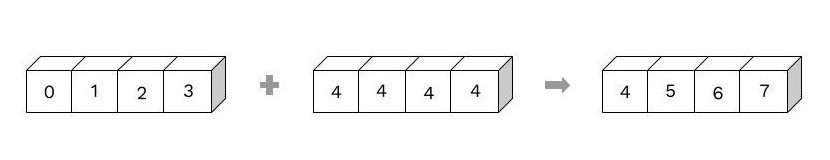


In [43]:
# Create an array of shape (4,)
a = np.arange(0, 4)
print('a:', a)

# Create an array of shape (4, 1)
b = np.arange(0, 4).reshape(4, 1)
print('b:', b)

a: [0 1 2 3]
b: [[0]
 [1]
 [2]
 [3]]


In [44]:
a + b

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

In the above example, a and b both stretches row-wise and col-wise respectively, which can be demonstrated in the below figure:

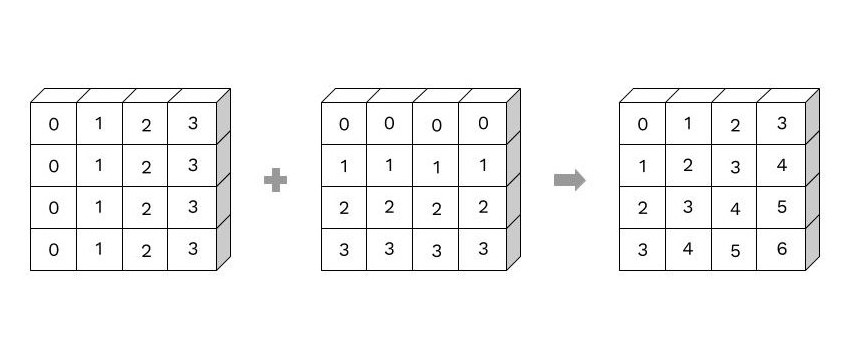


In [45]:
# Create an array of shape (3, 2)
a = np.arange(1, 7).reshape(3, 2)

# Create an array of shape (2,)
b = np.ones((2,))

In [46]:
a + b

array([[2., 3.],
       [4., 5.],
       [6., 7.]])

In the above example, broadcasting takes for the b, which is demonstrated in the below figure:

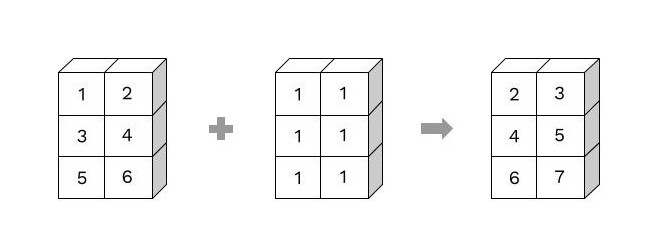


In [47]:
# Create an array of shape (3, 2)
a = np.arange(1, 7).reshape(3, 2)

# Create an array of shape (3,)
b = np.ones((3,))

In [48]:
a + b

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In the above example, broadcasting does not take place as the shapes are incompatible, which can be demonstrated in the below figure:

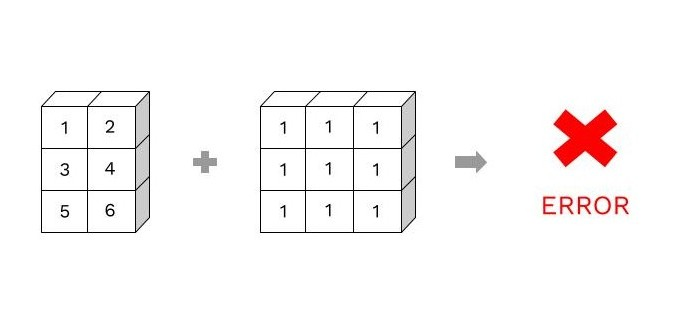


### Fancy Indexing

Fancy indexing is simply accessing multiple elements of an array at once through the use of an array of indices. It's slicing in simple ways.

Let's walk through a few examples to understand the above:


In [49]:
# Create an array of shape (3, 3)
a = np.random.randint(10, size=(3, 3))
print(a)

[[4 0 1]
 [5 2 8]
 [9 8 3]]


In [50]:
# Access the element 2, 5, 4
row = np.array([0, 1, 2])
col = np.array([1, 0, 2])
a[row, col]

array([0, 5, 3])

In [51]:
# Access elements in random order from last 2 rows
a[1:, col]

array([[2, 5, 8],
       [8, 9, 3]])

In the above example, broadcasting is used for the row indices.


In [52]:
a = np.random.randint(50, size=10)
print(a)

[20 21 29 30 28 12 10  3 38  1]


In [53]:
mask = a > 25
print(mask)

[False False  True  True  True False False False  True False]


Mask means boolean indexing where the `True` value indicates that the element at a particular index satisfies the conditions. This mask array helps us filtering the elements, and we can access the elements from the array using the mask as an array of indices.


In [54]:
# Array of elements greater than 25
print(a[mask])

[29 30 28 38]


This masking can also be useful for modifying the values of arrays that do not satisfy the constraints. Let's see an example:


In [55]:
# Create an array of shape (10,)
a = np.random.randint(-10, 10, size=(10,))
print(a)

[ 6  4  9  9 -7  3 -8  9  5 -3]


In [56]:
# Elements with the negative value
neg_mask = a < 0
print(a[neg_mask])

[-7 -8 -3]


In [57]:
# Modifying the array so all elements are greater than or equal to zero
a[neg_mask] = 0
print(a)

[6 4 9 9 0 3 0 9 5 0]


### Strides

Computer Memory is a single tape where we need to travel sequentially in order to access the data. Strides specify the number of bytes we need to travel in the memory to access the adjacent element along each dimension.  Numpy arrays are stored in a contiguous block of memory, so strides become really handy. Strides are multiples of 8 and by default row-major.


In [58]:
# Create an array of shape (3, 2)
a = np.random.random((3, 2))
print(a)

[[0.07495098 0.03693228]
 [0.48777201 0.60112812]
 [0.47782039 0.18343593]]


In [59]:
print_info(a)

number of elements: 6
number of dimensions: 2
shape: (3, 2)
data type: float64
strides: (16, 8)
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



`strides: (16, 8)` indicates that we need to travel 16 bytes to get the adjacent element row-wise and 8 bytes to get the adjacent element col-wise.


In [60]:
# Performing the transpose of array a
a_T = a.T
print(a_T)

[[0.07495098 0.48777201 0.47782039]
 [0.03693228 0.60112812 0.18343593]]


In [61]:
print_info(a_T)

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: float64
strides: (8, 16)
flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



If you notice the strides have been reversed from `(16, 8)` to `(8, 16)`, which tells us that this is just the view of array `a’. This is the reason why NumPy is memory efficient as it points to the memory instead of creating another array as compared to python.

Note that the `F_CONTIGUOUS: True` which means the array `a_T` is column-major.

`np.reshape` is also based on the idea of strides, which returns the view of the same array with modified strides:


In [62]:
b = a.reshape(6,)
print(b)

[0.07495098 0.03693228 0.48777201 0.60112812 0.47782039 0.18343593]


In [63]:
print_info(b)

number of elements: 6
number of dimensions: 1
shape: (6,)
data type: float64
strides: (8,)
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



Broadcasting also uses the concept of `strides` when performing arithmetic operations. Let’s see an example:


In [64]:
# Create an array of shape (3, 2)
a = np.random.random((3, 2))
print(a)

# Create an array of shape (10,)
b = np.random.randint(10, size=4)
print(b)

[[0.76096701 0.23538774]
 [0.31361445 0.58805459]
 [0.91557476 0.24585326]]
[9 0 8 2]


In [65]:
c = a + b

ValueError: operands could not be broadcast together with shapes (3,2) (4,) 

Broadcasting, by default, gives us an error as the above operation does not satisfy broadcasting rules. Let’s apply some modifications, so it satisfies the broadcasting rules, and we get the array of shape `(4, 3, 2)`:


In [66]:
# Increase the dimension of b
c = a + b[:, np.newaxis, np.newaxis]
print_info(c)

number of elements: 24
number of dimensions: 3
shape: (4, 3, 2)
data type: float64
strides: (48, 16, 8)
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



`np.broadcast_arrays` returns the broadcasted arrays of the same shape that NumPy adds together in the above code block.


In [67]:
a_broadcast, b_broadcast = np.broadcast_arrays(a, b[:, np.newaxis, np.newaxis])

In [68]:
print_info(a_broadcast)

number of elements: 24
number of dimensions: 3
shape: (4, 3, 2)
data type: float64
strides: (0, 16, 8)
flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True  (with WARN_ON_WRITE=True)
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [69]:
print(a_broadcast)

[[[0.76096701 0.23538774]
  [0.31361445 0.58805459]
  [0.91557476 0.24585326]]

 [[0.76096701 0.23538774]
  [0.31361445 0.58805459]
  [0.91557476 0.24585326]]

 [[0.76096701 0.23538774]
  [0.31361445 0.58805459]
  [0.91557476 0.24585326]]

 [[0.76096701 0.23538774]
  [0.31361445 0.58805459]
  [0.91557476 0.24585326]]]


`strides: (0, 16, 8)` indicates that the virtual view of the array a in which the view of the array appears as many times as the leading shape. In the above case, it is 4 times.


In [70]:
print_info(b_broadcast)

number of elements: 24
number of dimensions: 3
shape: (4, 3, 2)
data type: int64
strides: (8, 0, 0)
flags:   C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True  (with WARN_ON_WRITE=True)
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [71]:
print(b_broadcast)

[[[9 9]
  [9 9]
  [9 9]]

 [[0 0]
  [0 0]
  [0 0]]

 [[8 8]
  [8 8]
  [8 8]]

 [[2 2]
  [2 2]
  [2 2]]]


`strides: (8, 0, 0)` indicates that the virtual array consists of every element of array b, which appears as a 2D array of shape (3, 2)

How can we manipulate the strides and shape of an array to produce a virtual array that is much bigger but using the same memory?


In [72]:
def repeat(arr, n):
    """
    Produce a virtual array which is n times bigger 
    than arr without extra memory usage
    Parameters:
    arr - nd array
          Input array
    n   - int
          Size of repeated array
    """
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n,) + arr.shape,
                                           strides=(0,) + arr.strides)

In [73]:
repeat(np.random.random(4), 3)

array([[0.27505351, 0.06159749, 0.03617048, 0.33832092],
       [0.27505351, 0.06159749, 0.03617048, 0.33832092],
       [0.27505351, 0.06159749, 0.03617048, 0.33832092]])

## Exercises

Create a 2D array with 1 on the border and 0 inside.


In [74]:
X = np.ones((5, 5))
X[1:-1, 1:-1] = 0

# Alternative way using np.zeros
X = np.zeros((5, 5))
X[:, [0, -1]] = 1
X[[0, -1], 1:-1] = 1

Normalize a 5 x 5 random matrix.


In [75]:
X = np.random.random((5, 5))
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

Given a 1D array, negate all elements which are between 3 and 8 inclusive, in place.


In [76]:
X = np.arange(11)
mask = (2 < X) & (X < 9)
X[mask] *= -1

How to get the alternates dates corresponding to the month of July 2016?


In [77]:
X = np.arange('2016-07', '2016-08', 2, dtype='datetime64[D]')

Create a vector of size 10 with values ranging from 0 to 1, both excluded.


In [78]:
X = np.linspace(0, 1, 12)[1:-1]

# Alternative way
X = np.linspace(0, 1, 11, endpoint=False)[1:]

How to sort an array by the nth column?


In [79]:
X = np.random.randint(0, 10, (4, 3))
nth_col_sort_idx = X[:, -1].argsort()
X_sort = X[nth_col_sort_idx]

Find the nearest value from a given value in an array.


In [80]:
X = np.random.rand(10)
val = 0.75
nearest = X[np.abs(X - val).argmin()]

How to accumulate elements of a vector (X) to an array (F) based on an index list (I)?


In [81]:
X = np.random.randint(10, size=5)
I = np.random.randint(10, size=5)
F = np.bincount(I, X)

Considering a four dimensions array, how to get sum over the last two axis at once?


In [82]:
X = np.random.random((4, 4, 4, 4))
# Flatten the two dimensions into one
new_shape = X.shape[:-2] + (-1,)
Y = X.reshape(new_shape).sum(axis=-1)

# Alternative way
# X = np.random.random((4, 4, 4, 4))
# Tuple of axis (supported for numpy 1.7.0 onwards)
# Y = X.sum(axis=(-2, -1))

Create a function to produce a sliding window view of a 1D array.


In [83]:
def sliding_window(arr, size=2):
    """
    Produce an array of sliding window views of arr
    Parameters:
    arr  - nd array
           Input array
    size - int, optional
           Size of sliding window
    """
    N = arr.shape[0]
    s = arr.strides[0]
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(N - size + 1, size),
                                           strides=(s, s))

## Future Resources

So far, we’ve covered many of the basics of using NumPy for performing scientific computing. But there’s still a lot of material that you can learn from. To learn more about Numpy, I would definitely recommend the following:

- [Pandas Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) covers much more about Numpy. But it also has other libraries such as Pandas, Matplotlib very well explained with code walkthrough.
- [Advanced NumPy - SciPy 2019](https://www.youtube.com/watch?v=cYugp9IN1-Q) covers a lot of advanced material that we have not touched on in this post.
- [Scipy Lecture Notes](https://scipy-lectures.org/) is a good resource for learning libraries related to scientific computing such as NumPy, SciPy in Python
- [100 NumPy Exercises](https://github.com/rougier/numpy-100) is a good place to test your knowledge.


## References

- [Numpy](https://numpy.org/doc/stable/index.html)
- [Introduction to Numerical Computing with NumPy - SciPy 2019](https://www.youtube.com/watch?v=ZB7BZMhfPgk)
- [Advanced NumPy - SciPy 2019](https://www.youtube.com/watch?v=cYugp9IN1-Q)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)
- [100 NumPy Exercises](https://github.com/rougier/numpy-100)
